<h4 align="center" >Sprawozdanie</h4>
<h4 align="center" >Elektronika analogowa</h4>
<h1 align="center" >Filtry Pasywne</h1>

<div style="width: 100%; height: 100px;"></div>

# 1. Wstep

Filtrem częstotliwości nazywamy układ o strukturze czwórnika (czwórnik to układ mający cztery zaciski – jedna z par zacisków pełni rolę wejścia, zaś druga wyjścia), który przepuszcza bez tłumienia lub z małym tłumieniem napięcia i prądy o określonym paśmie częstotliwości, a tłumi napięcia i prądy leżące poza tym pasmem. Filtry częstotliwości mają głównie zastosowanie w urządzeniach elektronicznych i energetycznych.

Wyrozniamy filtry aktywne, czyli takie w, ktorych ukladzie wykorzystuje sie elementy aktywne takie jak wzmacniacze operacyjne. Na zajeciach zajmowalismy sie filtrami pasywnymi zbudowanych z samych elementow pasywnych.

In [2]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Filtr dolnoprzepustowy

Wartosci teoretyczne jakie wybralismy to rezystancja $10 k\Omega$ natomiast pojemnosc $3.3 nF$. Do pomiarow wykorzystalismy kondensator o pojemnosci $3.3 nF$ oraz rezystor o rezystancji $9,9664 k\Omega$.

In [9]:
R = 9.9664 * 1e3
C = 3.3 * 1e-9

# Czestotliwosc graniczna naszego filtra
borderFreq = 1 / (2* np.pi * R * C)
print(f"Czestotliwosc graniczna uzytego filtra wynosi: {borderFreq}")
print(f"Czestosc graniczna uzytego filtra wynosi: {borderFreq*2*np.pi}")

Czestotliwosc graniczna uzytego filtra wynosi: 4839.136562239894
Czestosc graniczna uzytego filtra wynosi: 30405.191747301236


<div style="width: 100%; height: 100px;"></div>

### Transmitancja filtra dolno przepustowego

$$G(s) = \frac{1}{1 + RCs}$$
$$G(s) = \frac{1}{1 + 3.288912 \cdot 10^{-5}s}$$

In [4]:
dolnoPrzepustowy = pd.read_csv("dolno_przepustowy.csv", sep=";")
dolnoPrzepustowy["G[db]"] = 20 * np.log10(dolnoPrzepustowy["Vpp_wyj"] / dolnoPrzepustowy["Vpp_wej"])
dolnoPrzepustowy

,Vpp_wyj,Vpp_wej,Freq,G[db]
0,1.04,1.02,1.0,0.168663
1,1.04,1.02,1.3,0.168663
2,1.04,1.02,1.7,0.168663
3,1.04,1.02,2.1,0.168663
4,1.02,1.02,2.8,0.000000
5,1.02,1.02,3.6,0.000000
6,1.02,1.02,4.6,0.000000
7,1.02,1.02,6.0,0.000000
8,1.00,1.02,7.7,-0.172003
9,1.00,1.02,10.0,-0.172003


<div style="width: 100%; height: 240px;"></div>

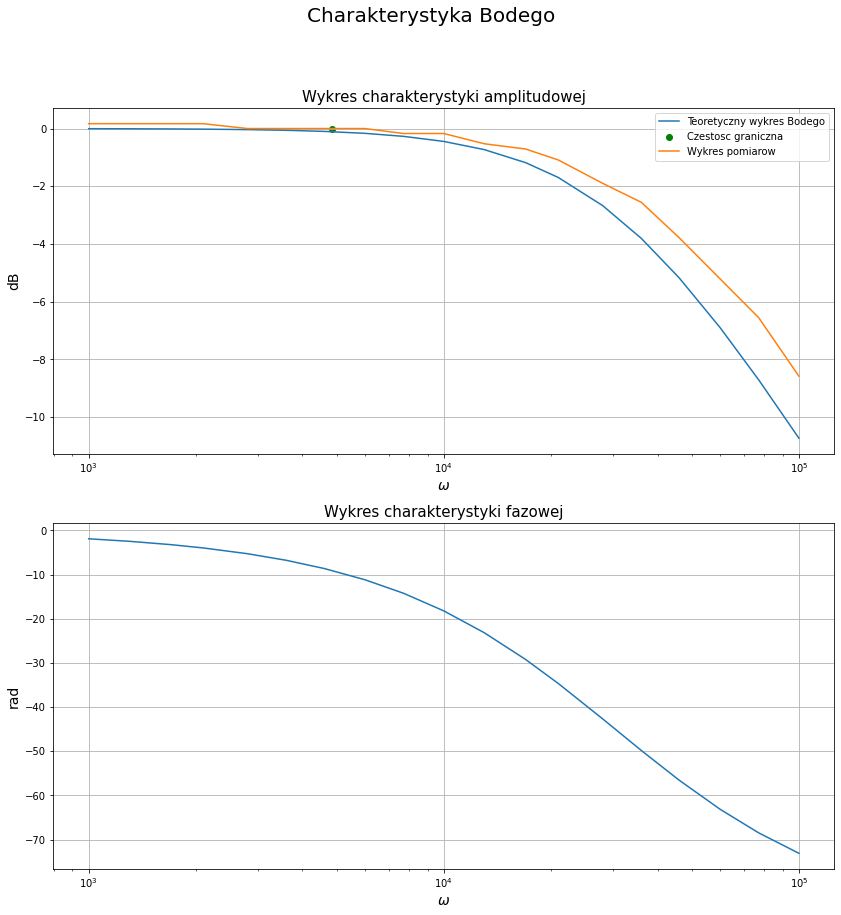

In [5]:
num = [0, 1]
den = [R*C, 1]
s1 = signal.TransferFunction(num, den)

w, mag, phase = signal.bode(s1, w=dolnoPrzepustowy["Freq"]*1000)
clear_output()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
fig.suptitle("Charakterystyka Bodego", fontsize=20)
ax1.semilogx(w, mag, label="Teoretyczny wykres Bodego")
ax1.scatter(borderFreq, 0, color="green", label="Czestosc graniczna")
ax1.semilogx(w, dolnoPrzepustowy["G[db]"], label="Wykres pomiarow")
ax1.set_title("Wykres charakterystyki amplitudowej", fontsize=15)
ax1.set_xlabel("$\omega$", fontsize=14)
ax1.set_ylabel("dB", fontsize=14)
ax1.grid()
ax1.legend()

ax2.semilogx(w, phase)
# ax2.set_xlim(10e-10, 10e10)
ax2.set_title("Wykres charakterystyki fazowej", fontsize=15)
ax2.grid()
ax2.set_xlabel("$\omega$", fontsize=14)
ax2.set_ylabel("rad", fontsize=14)
plt.show()

<div style="width:100%;height:200px;"></div>


# Filtr gorno przepustowy


$$G(s) = \frac{RC}{RC \cdot s + 1}$$

In [10]:
R = 9.06 * 1e3
C = 1.134 * 1e-9

# Czestotliwosc graniczna naszego filtra
borderFreq = 1 / (2* np.pi * R * C)
print(f"Czestotliwosc graniczna uzytego filtra gorno przepustowego wynosi: {borderFreq}")
print(f"Czestosc graniczna uzytego filtra gornoprzepustowego wynosi: {borderFreq*2*np.pi}")
R * C

Czestotliwosc graniczna uzytego filtra gorno przepustowego wynosi: 15490.979506785583
Czestosc graniczna uzytego filtra gornoprzepustowego wynosi: 97332.69483085525


1.027404e-05

In [7]:
gornoPrzepustowy = pd.read_csv("gorno_przepustowy.csv", sep=";")
gornoPrzepustowy["Vpp_wyj"] = gornoPrzepustowy["Vpp_wyj"] * 1e-3
gornoPrzepustowy["Freq"] = gornoPrzepustowy["Freq"] * 1e3
gornoPrzepustowy["G[db]"] = 20 * np.log10(gornoPrzepustowy["Vpp_wyj"] / gornoPrzepustowy["Vpp_wej"])
gornoPrzepustowy

,Vpp_wyj,Vpp_wej,Freq,G[db]
0,0.010,1.04,1000.0,-40.340667
1,0.032,1.04,1300.0,-30.237667
2,0.072,1.04,1700.0,-23.194017
3,0.104,1.04,2100.0,-20.000000
4,0.168,1.04,2800.0,-15.834481
5,0.216,1.04,3600.0,-13.651592
6,0.264,1.04,4600.0,-11.908588
7,0.336,1.04,6000.0,-9.813881
8,0.400,1.04,7700.0,-8.299467
9,0.488,1.04,10000.0,-6.572270


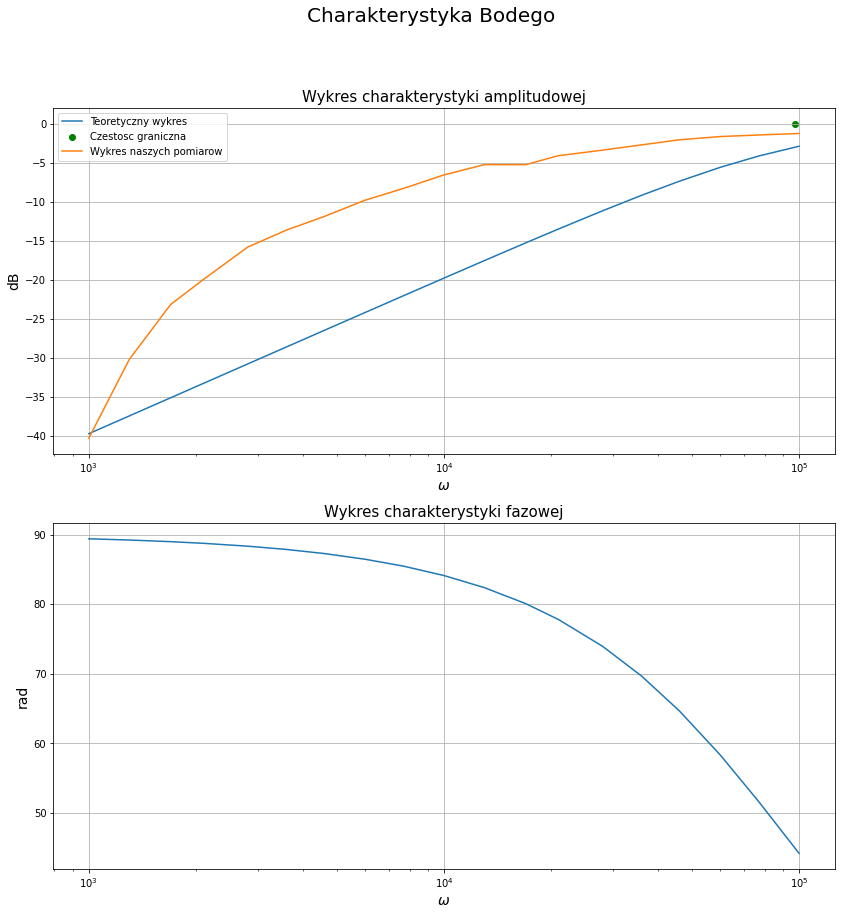

In [8]:
num = [R*C, 0]
den = [R*C, 1]
s1 = signal.TransferFunction(num, den)


w, mag, phase = signal.bode(s1, w=gornoPrzepustowy["Freq"])
clear_output()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
fig.suptitle("Charakterystyka Bodego", fontsize=20)
ax1.semilogx(w, mag, label="Teoretyczny wykres")
ax1.scatter(borderFreq*2*np.pi, 0, color="green", label="Czestosc graniczna")
ax1.semilogx(w, gornoPrzepustowy["G[db]"], label="Wykres naszych pomiarow")
ax1.set_title("Wykres charakterystyki amplitudowej", fontsize=15)
ax1.set_xlabel("$\omega$", fontsize=14)
ax1.set_ylabel("dB", fontsize=14)
ax1.grid()
ax1.legend()

ax2.semilogx(w, phase)
ax2.set_title("Wykres charakterystyki fazowej", fontsize=15)
ax2.grid()
ax2.set_xlabel("$\omega$", fontsize=14)
ax2.set_ylabel("rad", fontsize=14)
plt.show()